___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (7,4)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2762,2763,15589018,Padilla,719,Germany,Male,28,3,106070.290,2,1,1,183893.310,0
9200,9201,15567923,Barese,739,France,Female,30,6,0.000,1,0,0,122604.440,0
9656,9657,15603221,Burgess,696,Germany,Male,32,4,84421.620,1,0,1,52314.710,0
9600,9601,15570533,Conti,621,Germany,Female,55,7,131033.760,1,0,1,75685.590,1
4661,4662,15670416,Ferri,780,France,Female,43,0,0.000,1,0,1,15705.270,0
7263,7264,15622729,Sun,649,France,Female,46,2,0.000,2,1,1,66602.700,0
9748,9749,15680201,Marcelo,627,Germany,Male,24,5,102773.200,2,1,0,56793.020,1
3565,3566,15598700,Hysell,676,Spain,Female,30,5,0.000,2,0,1,157888.500,0
4225,4226,15671804,Wilding,648,Spain,Male,36,8,146943.380,2,1,1,130041.450,0
9429,9430,15577913,Oliver,651,France,Female,32,8,144581.960,1,1,1,87609.500,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.columns = map(str.lower, df.columns)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rownumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
customerid,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
creditscore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
numofproducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
hascrcard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
isactivemember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
estimatedsalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


## Row Number

In [11]:
df.rownumber.value_counts()

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: rownumber, Length: 10000, dtype: int64

In [12]:
df.drop("rownumber", axis = 1, inplace = True)
#This is a unnecessary column, so we drop it.

## CustomerID

In [13]:
df.customerid.value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: customerid, Length: 10000, dtype: int64

In [14]:
df.drop("customerid", axis = 1, inplace = True)
#This is a unnecessary column, so we drop it.

## Credit Score

In [15]:
df.creditscore.value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: creditscore, Length: 460, dtype: int64

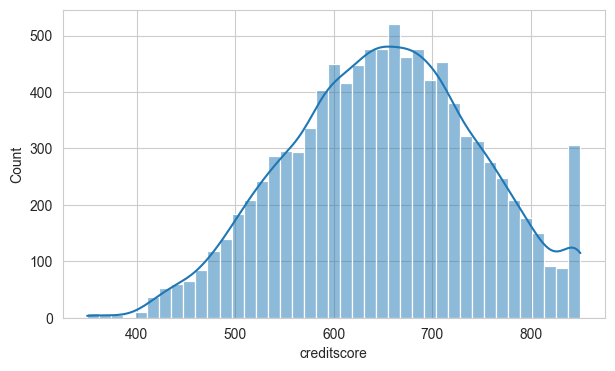

In [16]:
sns.histplot(x = "creditscore", data = df, kde=True);

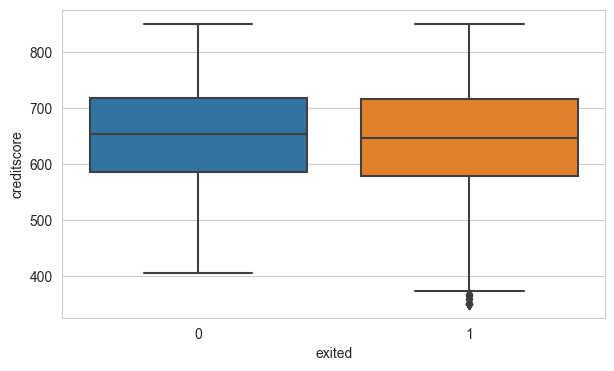

In [17]:
sns.boxplot(x = df.exited, y =df.creditscore);

## Geography

In [18]:
df.geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

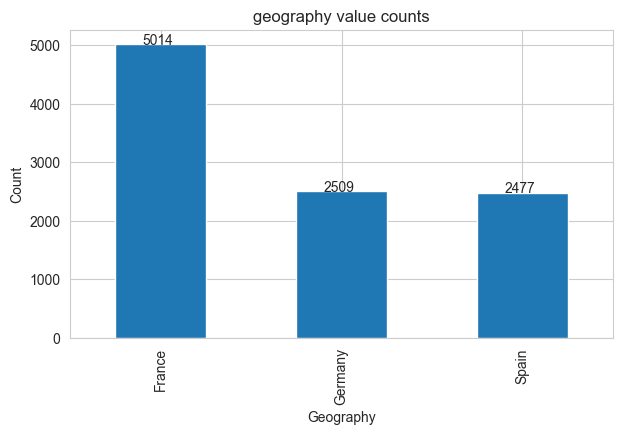

In [19]:
ax = df.geography.value_counts().plot(kind="bar")
ax.set_xlabel("Geography")
ax.set_ylabel("Count")
ax.set_title("geography value counts")
for i, v in enumerate(df.geography.value_counts()):
    ax.text(i - 0.1, v + 0.5, str(v))
plt.show()

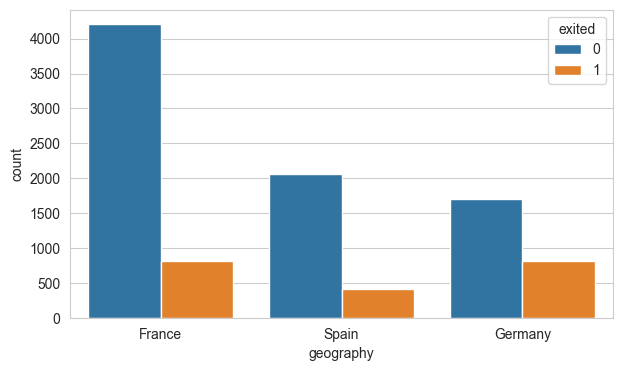

In [20]:
sns.countplot(x = "geography", data = df ,hue= "exited");

In [21]:
df.columns

Index(['surname', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

## Gender

In [22]:
df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [23]:
df.groupby(["gender"])["exited"].value_counts(normalize=True)

gender  exited
Female  0        0.749
        1        0.251
Male    0        0.835
        1        0.165
Name: exited, dtype: float64

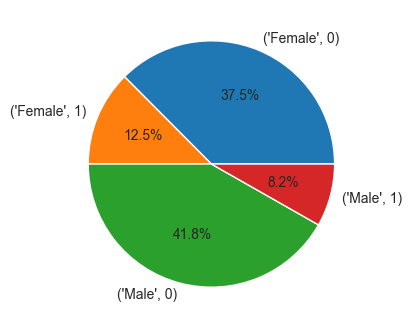

In [24]:
fig, ax = plt.subplots()
ax.pie(df.groupby(["gender"])["exited"].value_counts(normalize=True), labels=df.groupby(["gender"])["exited"].value_counts(normalize=True).index, autopct='%1.1f%%')
plt.show()

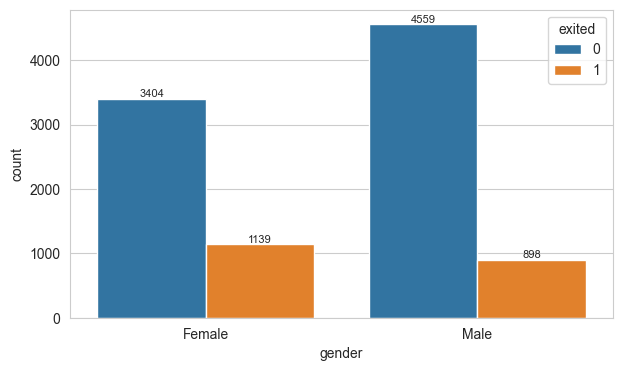

In [25]:
grouped_df = df.groupby(["gender"])["exited"].value_counts().reset_index(name="count")
ax = sns.barplot(x="gender", y="count", hue="exited", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

In [26]:
df['gender'] = df['gender'].replace(['Female', 'Male'], [0, 1])

## Age

In [27]:
df.age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

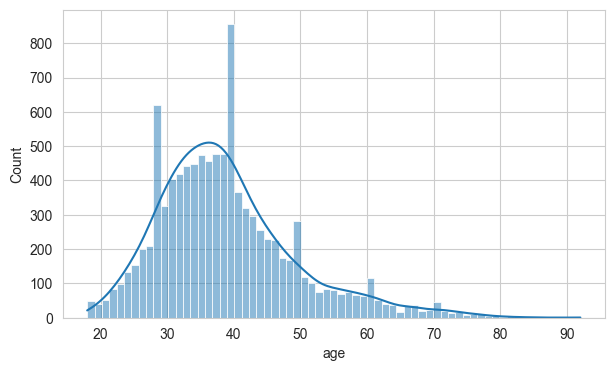

In [28]:
sns.histplot(x = "age", data = df, kde=True);

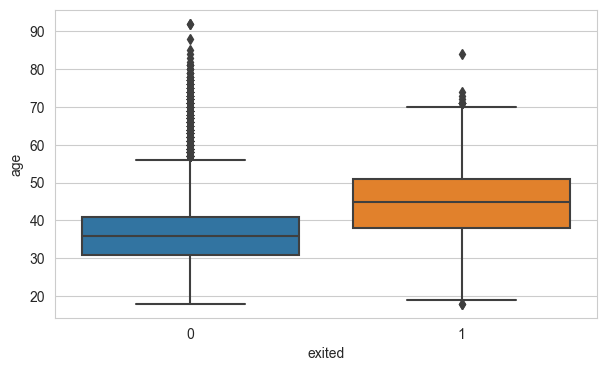

In [29]:
sns.boxplot(x = "exited", y ="age", data = df);

## Tenure

In [30]:
df.tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

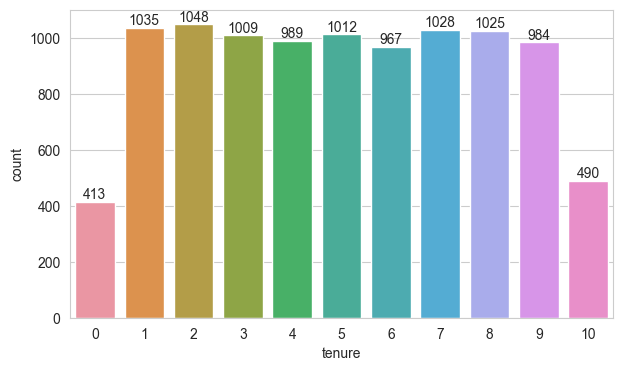

In [31]:
ax = sns.countplot(x = "tenure", data = df)
ax.bar_label(ax.containers[0]);

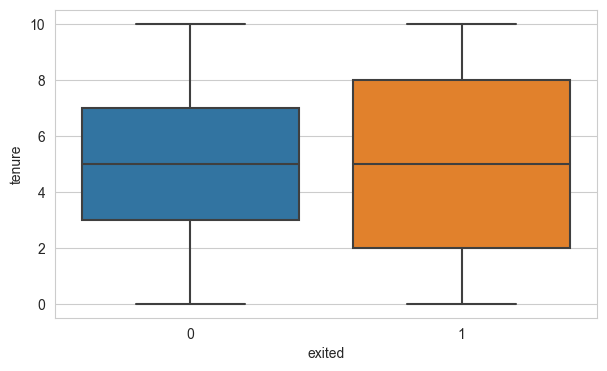

In [32]:
sns.boxplot(x = "exited", y = "tenure", data = df);

## Balance

In [33]:
df.balance.value_counts()

0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
              ... 
81556.890        1
112687.690       1
108698.960       1
238387.560       1
130142.790       1
Name: balance, Length: 6382, dtype: int64

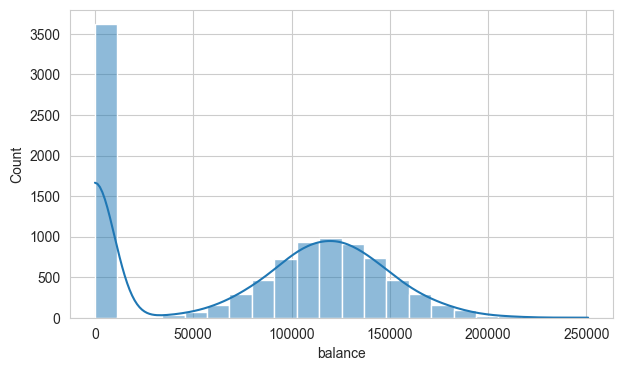

In [34]:
sns.histplot(x = "balance", data = df, kde=True);

## Number of Products

In [35]:
df.numofproducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: numofproducts, dtype: int64

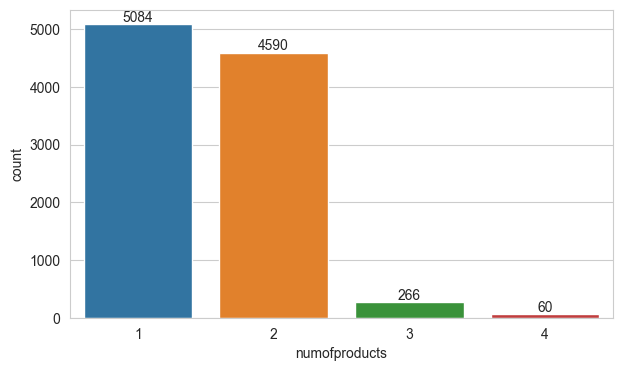

In [36]:
ax = sns.countplot(x = "numofproducts", data = df)
ax.bar_label(ax.containers[0]);

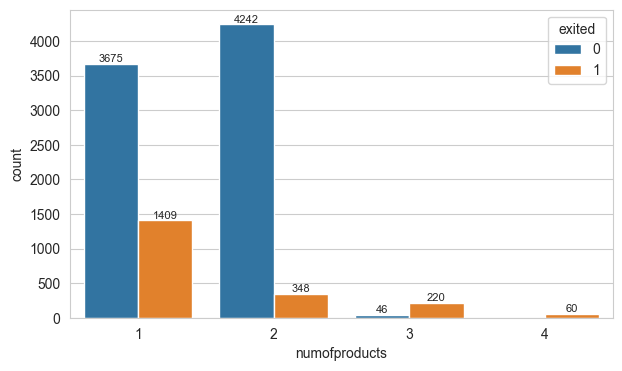

In [37]:
grouped_df = df.groupby(["numofproducts"])["exited"].value_counts().reset_index(name="count")
ax = sns.barplot(x="numofproducts", y="count", hue="exited", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

In [38]:
df.columns

Index(['surname', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

## Has Credit Card?

In [39]:
df.hascrcard.value_counts()

1    7055
0    2945
Name: hascrcard, dtype: int64

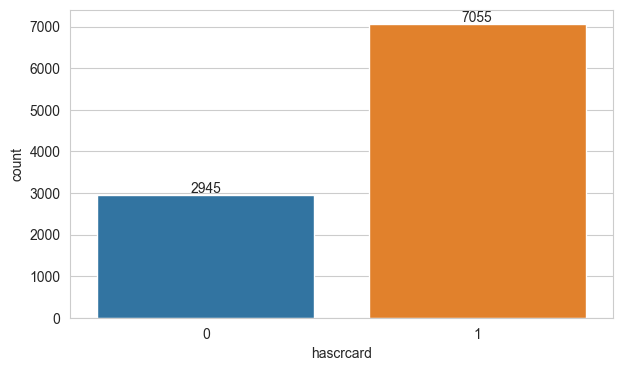

In [40]:
ax = sns.countplot(x = "hascrcard", data = df)
ax.bar_label(ax.containers[0]);

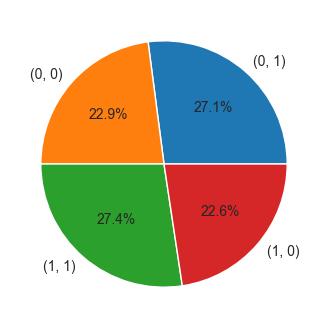

In [41]:
fig, ax = plt.subplots()
ax.pie(df.groupby(["hascrcard"])["gender"].value_counts(normalize=True), labels=df.groupby(["hascrcard"])["gender"].value_counts(normalize=True).index, autopct='%1.1f%%')
plt.show()

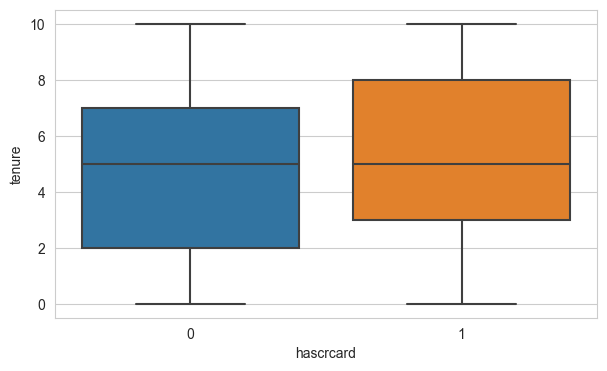

In [42]:
sns.boxplot(x = "hascrcard", y = "tenure", data = df);

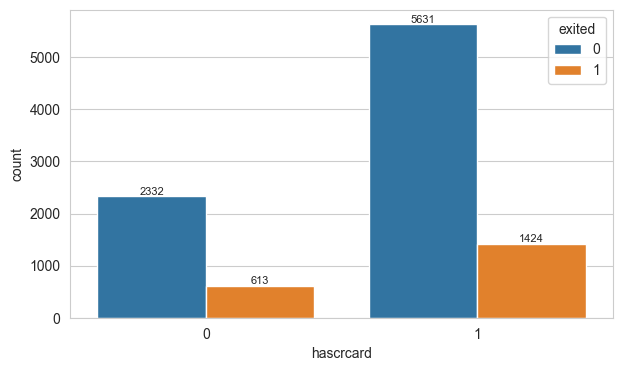

In [43]:
grouped_df = df.groupby(["hascrcard"])["exited"].value_counts().reset_index(name="count")
ax = sns.barplot(x="hascrcard", y="count", hue="exited", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

In [44]:
df.columns

Index(['surname', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

## Is Active Member?

In [45]:
df.isactivemember.value_counts()

1    5151
0    4849
Name: isactivemember, dtype: int64

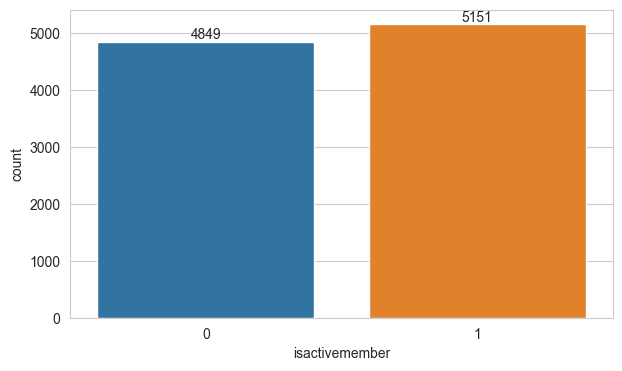

In [46]:
ax = sns.countplot(x = "isactivemember", data = df)
ax.bar_label(ax.containers[0]);

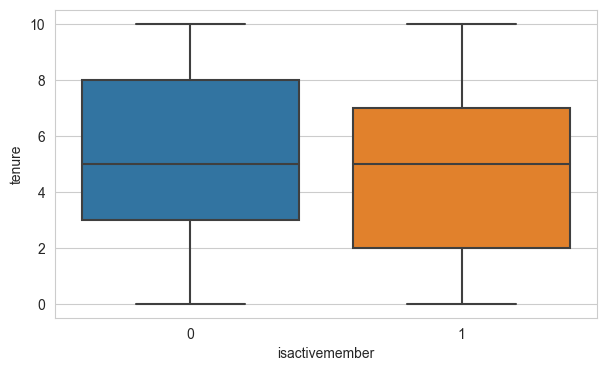

In [47]:
sns.boxplot(x = "isactivemember", y = "tenure", data = df);

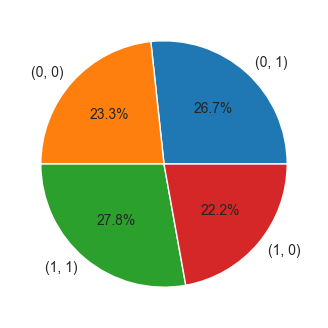

In [48]:
fig, ax = plt.subplots()
ax.pie(df.groupby(["isactivemember"])["gender"].value_counts(normalize=True), 
       labels=df.groupby(["isactivemember"])["gender"].value_counts(normalize=True).index, autopct='%1.1f%%')
plt.show()

In [49]:
df.groupby(["isactivemember"])["exited"].value_counts()

isactivemember  exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: exited, dtype: int64

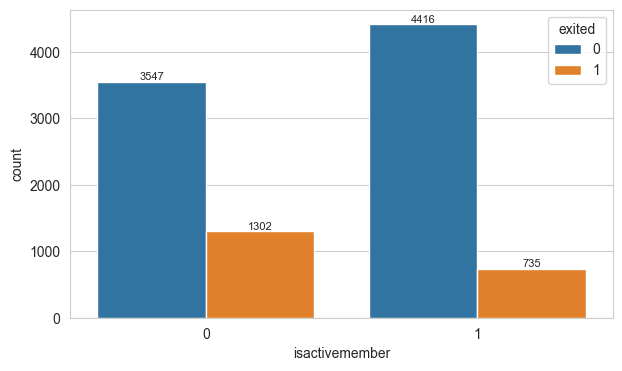

In [50]:
grouped_df = df.groupby(["isactivemember"])["exited"].value_counts().reset_index(name="count")
ax = sns.barplot(x="isactivemember", y="count", hue="exited", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

In [51]:
df.columns

Index(['surname', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

## Estimated Salary

In [52]:
df.estimatedsalary.value_counts()

24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
             ..
120893.070    1
188377.210    1
55902.930     1
4523.740      1
38190.780     1
Name: estimatedsalary, Length: 9999, dtype: int64

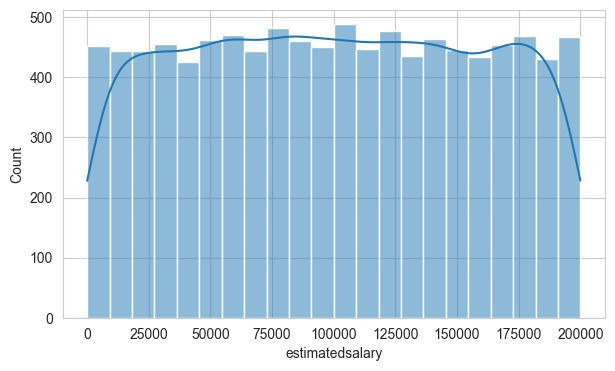

In [53]:
sns.histplot(x = "estimatedsalary", data = df, kde=True);

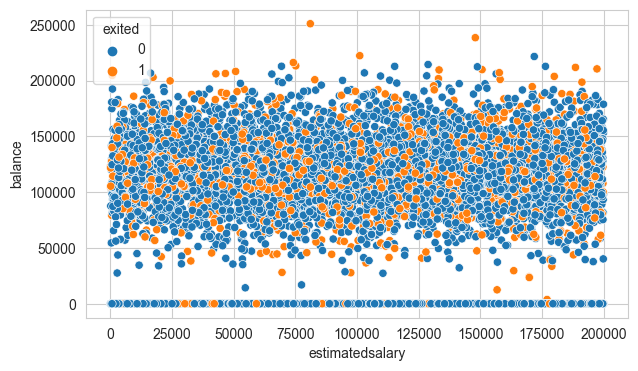

In [54]:
sns.scatterplot(x = "estimatedsalary", y = "balance", data = df, hue = "exited");

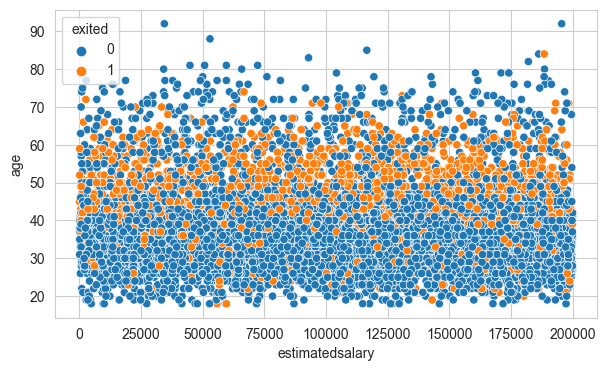

In [55]:
sns.scatterplot(x = "estimatedsalary", y = "age", data = df, hue = "exited");

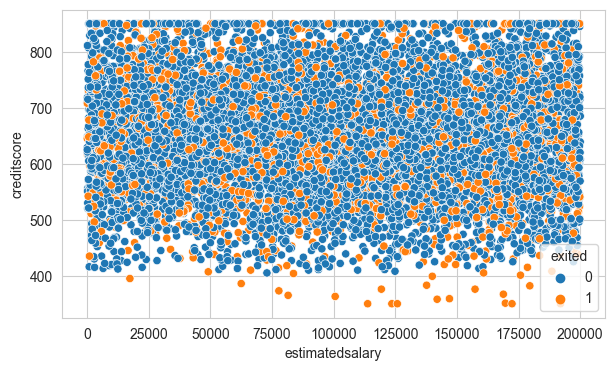

In [56]:
sns.scatterplot(x = "estimatedsalary", y = "creditscore", data = df, hue = "exited");

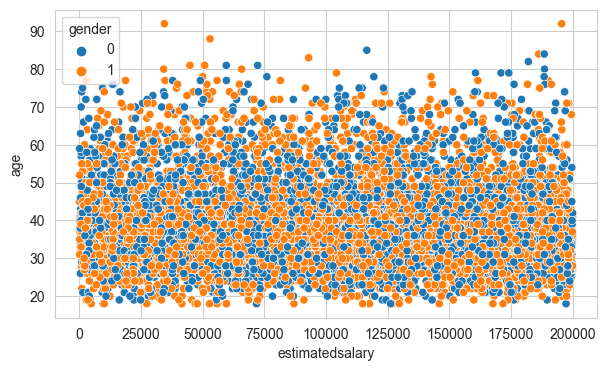

In [57]:
sns.scatterplot(x = "estimatedsalary", y = "age", data = df, hue = "gender");

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surname          10000 non-null  object 
 1   creditscore      10000 non-null  int64  
 2   geography        10000 non-null  object 
 3   gender           10000 non-null  int64  
 4   age              10000 non-null  int64  
 5   tenure           10000 non-null  int64  
 6   balance          10000 non-null  float64
 7   numofproducts    10000 non-null  int64  
 8   hascrcard        10000 non-null  int64  
 9   isactivemember   10000 non-null  int64  
 10  estimatedsalary  10000 non-null  float64
 11  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
creditscore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
gender,10000.000,0.546,0.498,0.000,0.000,1.000,1.000,1.000
age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
numofproducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
hascrcard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
isactivemember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
estimatedsalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [60]:
df.drop("surname", axis = 1, inplace = True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  int64  
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [62]:
df = pd.get_dummies(df, prefix=['geo'],columns=['geography'])

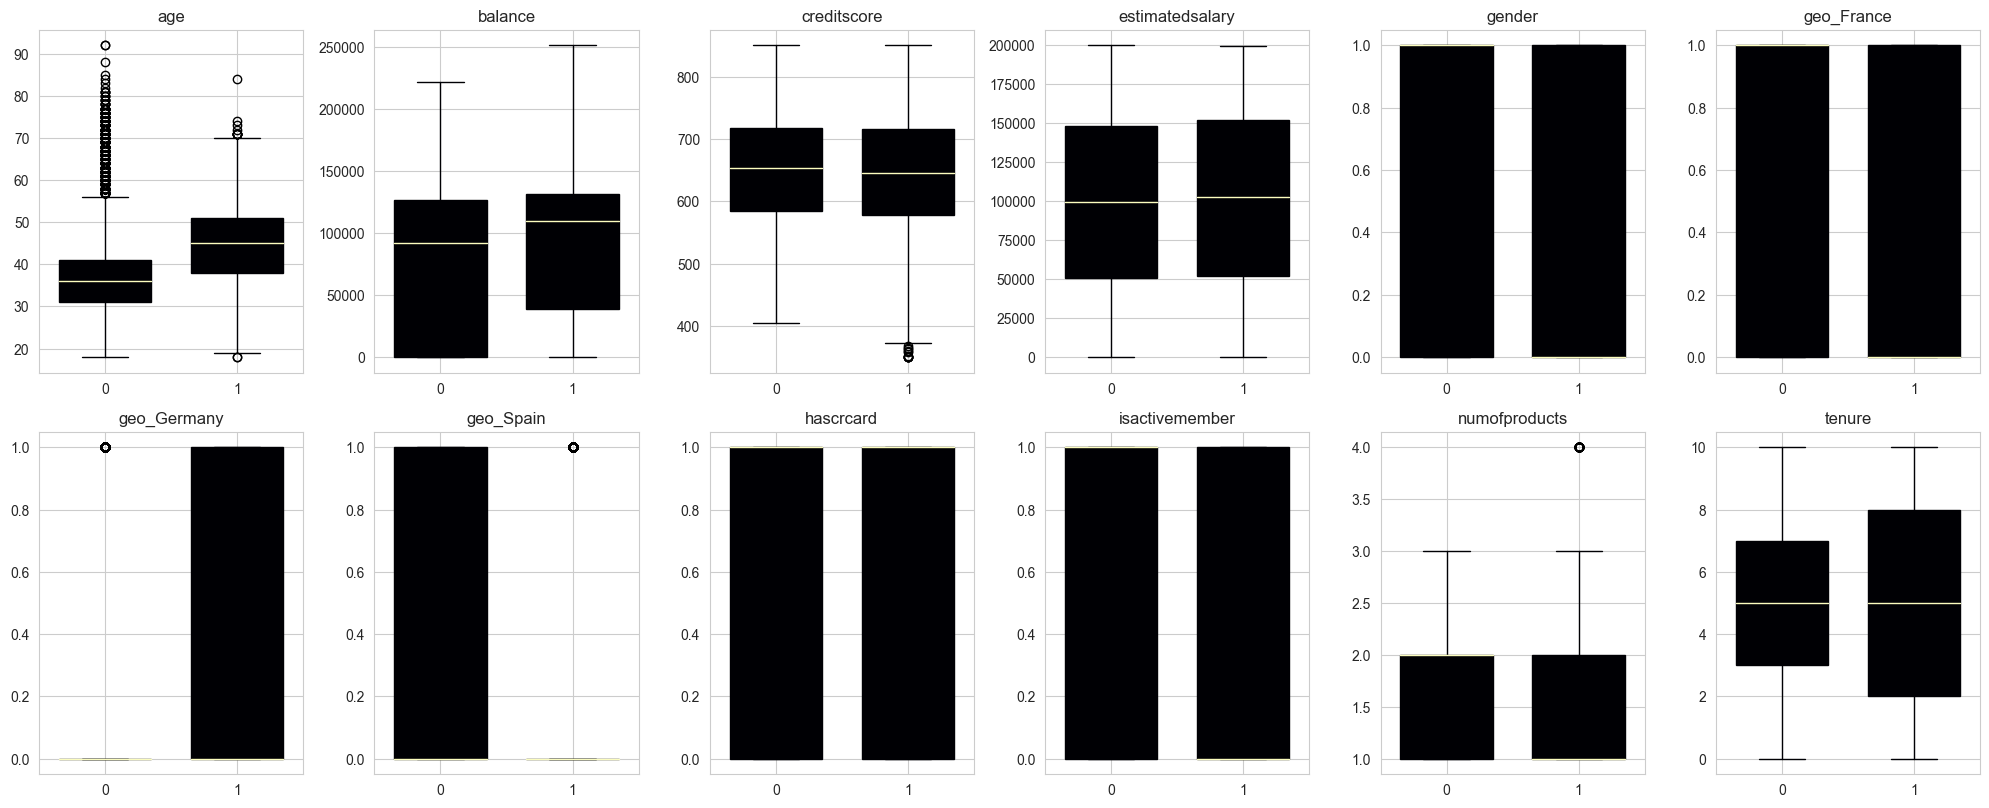

In [63]:
df.plot(kind="box",
        by= "exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

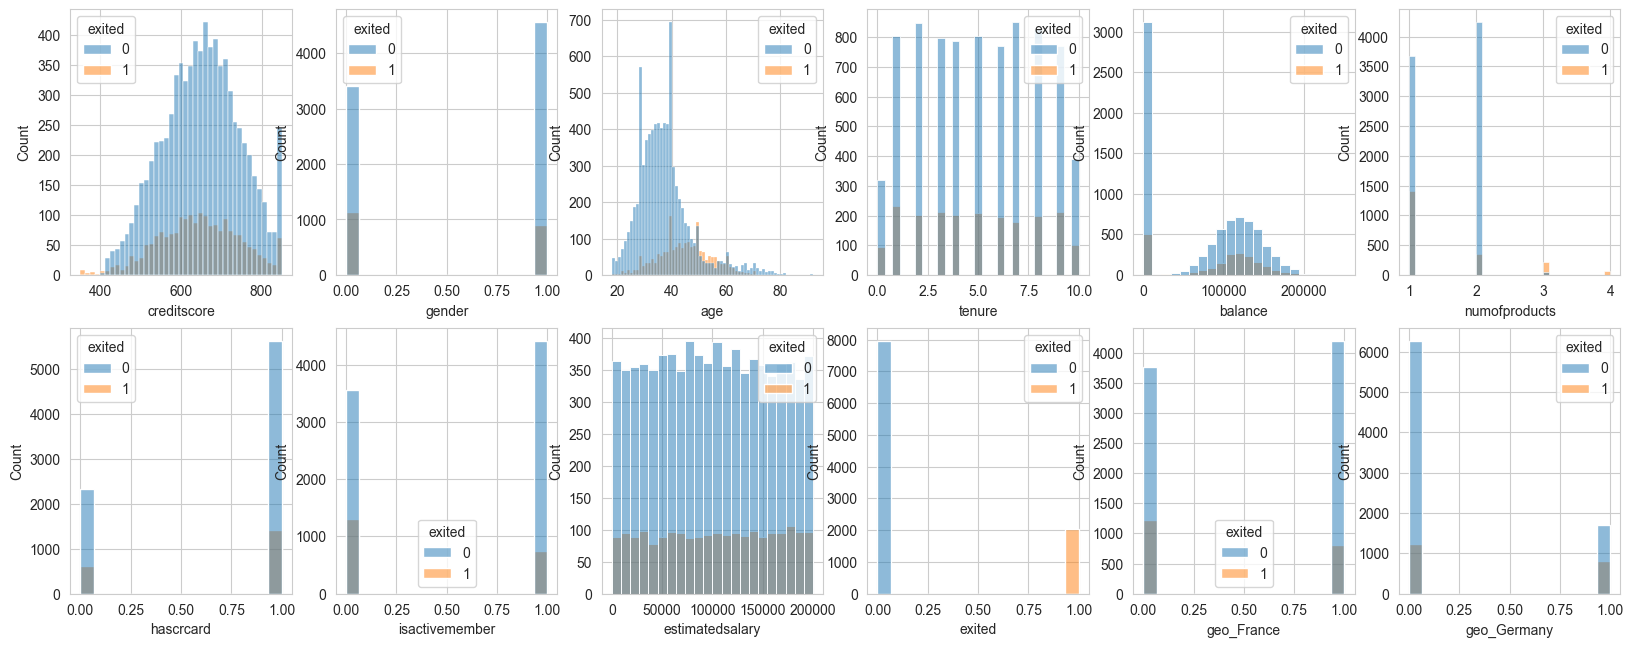

In [64]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='exited')

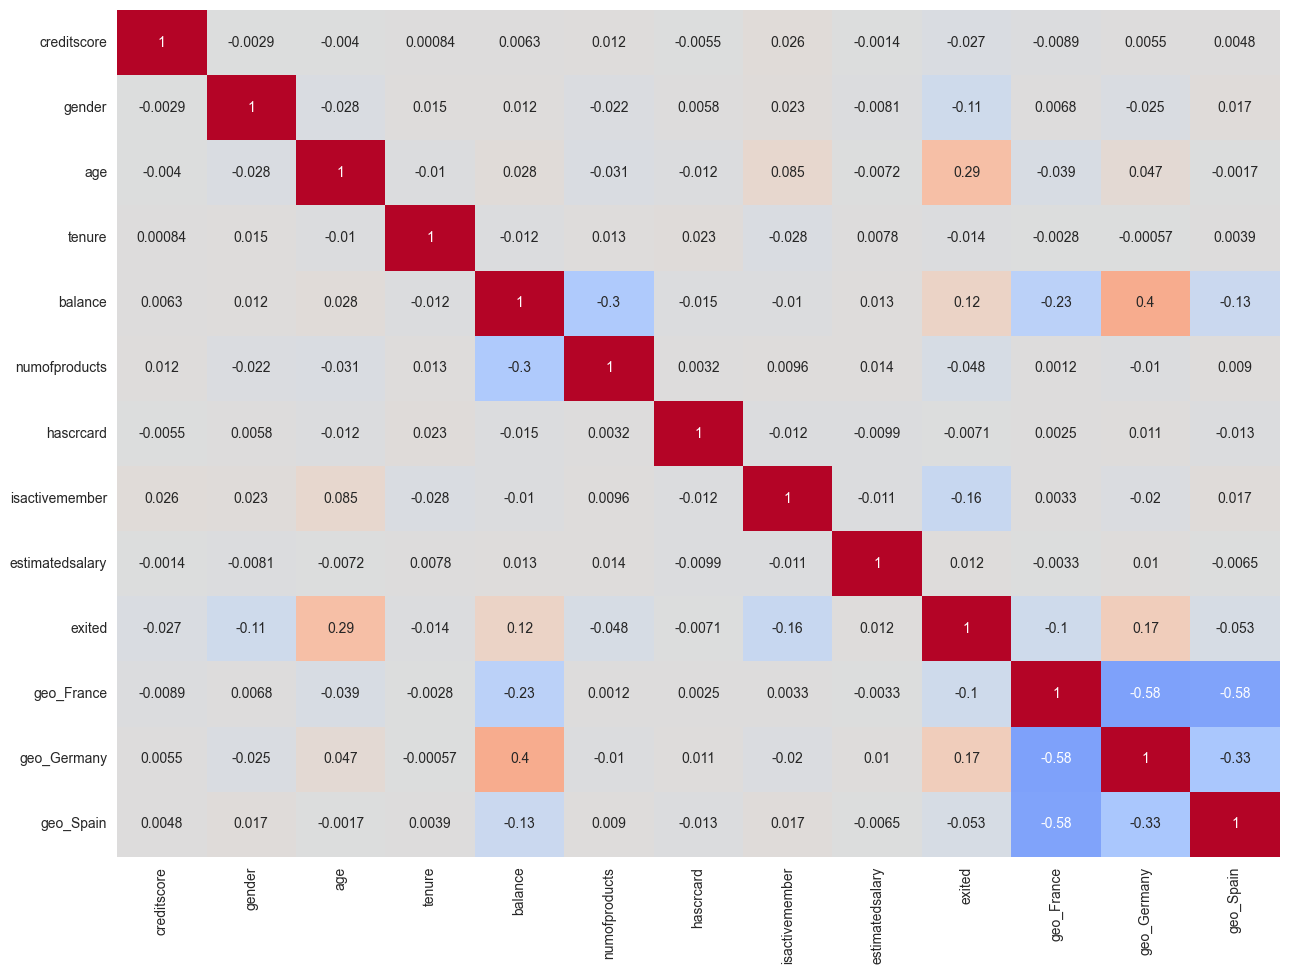

In [65]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False)
plt.show()

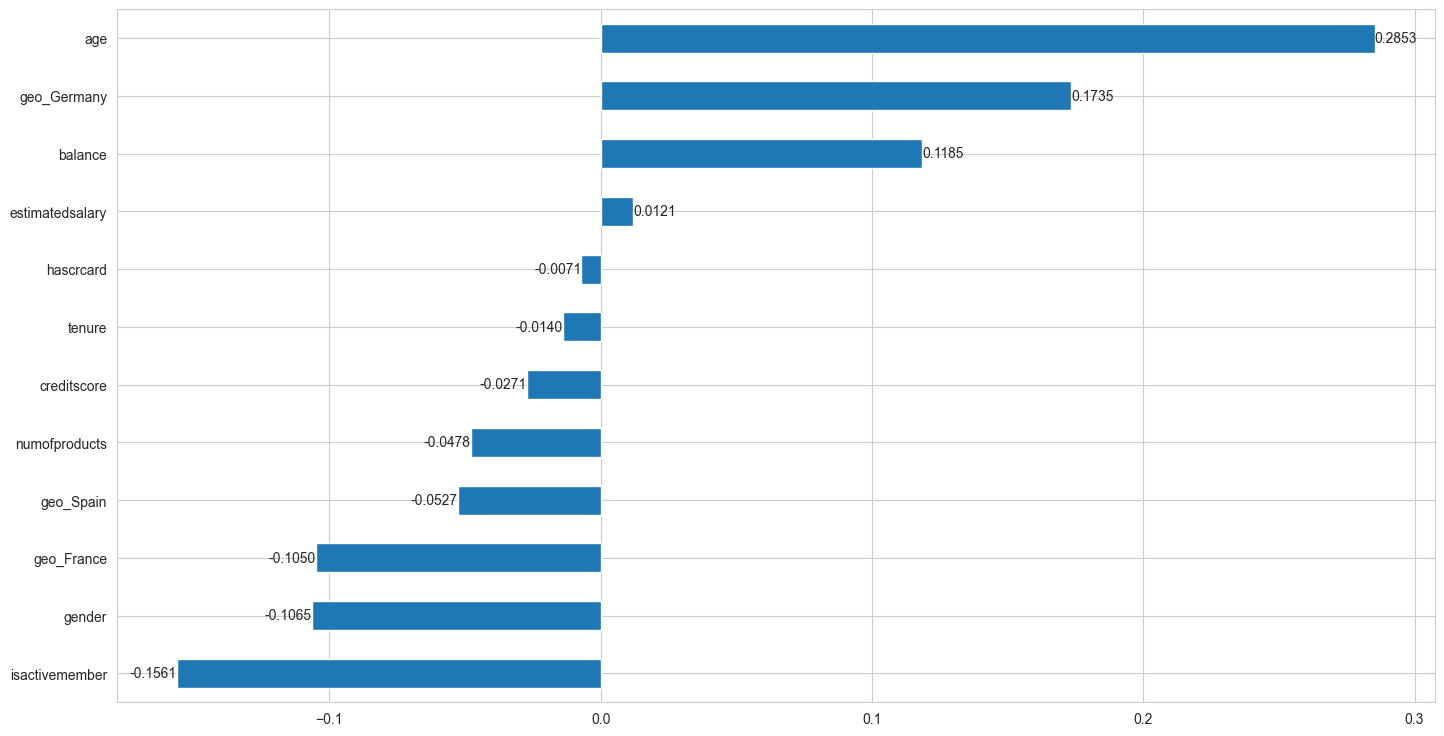

In [66]:
plt.figure(figsize=(17, 9))
ax = df.corr()["exited"].sort_values().drop("exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [68]:
X = df.drop('exited', axis=1)
y = df['exited']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [70]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.1, random_state=42 
)

In [71]:
scaler = MinMaxScaler()

In [72]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [74]:
X_train.shape

(7200, 12)

In [75]:
X_val.shape

(800, 12)

In [76]:
X_test.shape

(2000, 12)

In [77]:
tf.keras.utils.set_random_seed(42)

In [78]:
model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [79]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                234       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 4)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(12, 18) dtype=float32, numpy=
 array([[ 3.20374072e-01,  1.45459354e-01, -1.26372933e-01,
          4.02482867e-01, -3.77393603e-01,  1.36250138e-01,
          4.20827866e-01, -2.97028422e-01,  2.12777853e-02,
          1.16954923e-01, -3.69918734e-01, -4.79793251e-02,
          4.16833222e-01, -2.65277326e-02,  2.63532996e-03,
          2.37618923e-01, -4.30371583e-01, -2.75142878e-01],
        [ 1.27380490e-02, -3.87801498e-01, -4.13542897e-01,
          3.11230719e-01,  3.71570051e-01, -2.12389946e-01,
          3.21575105e-01, -3.33196878e-01, -3.37329507e-02,
          5.61001301e-02,  5.96510172e-02, -2.68183231e-01,
         -2.59658724e-01,  4.37521458e-01, -3.48922342e-01,
         -5.04338145e-02, -2.10111186e-01, -3.38968873e-01],
        [ 2.08529413e-01, -2.84123182e-01,  1.62155867e-01,
          1.34538829e-01, -4.09083456e-01,  5.69176078e-02,
         -1.48366064e-01, -1.01207316e-01,  4.06536281e-01,
         -8.01459849e-02,  2.8

In [82]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size= 60, 
          epochs=400,
          verbose=1)

Epoch 1/400
120/120 [==============================] - 3s 9ms/step - loss: 0.6834 - recall: 0.2843 - val_loss: 0.6534 - val_recall: 0.0000e+00
Epoch 2/400
120/120 [==============================] - 0s 3ms/step - loss: 0.5887 - recall: 0.0000e+00 - val_loss: 0.4912 - val_recall: 0.0000e+00
Epoch 3/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4842 - recall: 0.0000e+00 - val_loss: 0.4687 - val_recall: 0.0000e+00
Epoch 4/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4667 - recall: 0.0000e+00 - val_loss: 0.4590 - val_recall: 0.0000e+00
Epoch 5/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4566 - recall: 0.0000e+00 - val_loss: 0.4515 - val_recall: 0.0000e+00
Epoch 6/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4461 - recall: 0.0348 - val_loss: 0.4419 - val_recall: 0.0245
Epoch 7/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4362 - recall: 0.1200 - val_loss: 0.4294 - val_recall

120/120 [==============================] - 0s 2ms/step - loss: 0.3372 - recall: 0.4560 - val_loss: 0.3262 - val_recall: 0.4908
Epoch 60/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3360 - recall: 0.4567 - val_loss: 0.3232 - val_recall: 0.4785
Epoch 61/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3350 - recall: 0.4697 - val_loss: 0.3240 - val_recall: 0.4417
Epoch 62/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3350 - recall: 0.4608 - val_loss: 0.3222 - val_recall: 0.4785
Epoch 63/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3342 - recall: 0.4676 - val_loss: 0.3227 - val_recall: 0.4785
Epoch 64/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3334 - recall: 0.4635 - val_loss: 0.3217 - val_recall: 0.4663
Epoch 65/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3347 - recall: 0.4642 - val_loss: 0.3210 - val_recall: 0.4417
Epoch 66/400
120/120 [===========

120/120 [==============================] - 0s 2ms/step - loss: 0.3243 - recall: 0.4908 - val_loss: 0.3212 - val_recall: 0.4969
Epoch 118/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3252 - recall: 0.4915 - val_loss: 0.3190 - val_recall: 0.5031
Epoch 119/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3242 - recall: 0.4928 - val_loss: 0.3174 - val_recall: 0.4847
Epoch 120/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3244 - recall: 0.4888 - val_loss: 0.3186 - val_recall: 0.4969
Epoch 121/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3249 - recall: 0.4847 - val_loss: 0.3179 - val_recall: 0.4969
Epoch 122/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3252 - recall: 0.4949 - val_loss: 0.3166 - val_recall: 0.4969
Epoch 123/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3243 - recall: 0.4969 - val_loss: 0.3179 - val_recall: 0.5153
Epoch 124/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.3204 - recall: 0.4990 - val_loss: 0.3204 - val_recall: 0.4847
Epoch 176/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3202 - recall: 0.4969 - val_loss: 0.3192 - val_recall: 0.5092
Epoch 177/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3219 - recall: 0.4840 - val_loss: 0.3221 - val_recall: 0.4969
Epoch 178/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3200 - recall: 0.4956 - val_loss: 0.3202 - val_recall: 0.5215
Epoch 179/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3207 - recall: 0.4935 - val_loss: 0.3203 - val_recall: 0.5031
Epoch 180/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3200 - recall: 0.4901 - val_loss: 0.3233 - val_recall: 0.4601
Epoch 181/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3206 - recall: 0.4963 - val_loss: 0.3213 - val_recall: 0.5092
Epoch 182/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.3173 - recall: 0.4888 - val_loss: 0.3192 - val_recall: 0.5092
Epoch 234/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3183 - recall: 0.4915 - val_loss: 0.3235 - val_recall: 0.5399
Epoch 235/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3184 - recall: 0.4922 - val_loss: 0.3218 - val_recall: 0.4969
Epoch 236/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3174 - recall: 0.4942 - val_loss: 0.3190 - val_recall: 0.5031
Epoch 237/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3176 - recall: 0.4990 - val_loss: 0.3246 - val_recall: 0.5215
Epoch 238/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3177 - recall: 0.4928 - val_loss: 0.3235 - val_recall: 0.5399
Epoch 239/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3179 - recall: 0.4956 - val_loss: 0.3252 - val_recall: 0.4601
Epoch 240/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.3163 - recall: 0.4928 - val_loss: 0.3219 - val_recall: 0.5031
Epoch 292/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3153 - recall: 0.4949 - val_loss: 0.3253 - val_recall: 0.5399
Epoch 293/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3149 - recall: 0.4949 - val_loss: 0.3254 - val_recall: 0.5399
Epoch 294/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3151 - recall: 0.4969 - val_loss: 0.3226 - val_recall: 0.5215
Epoch 295/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3147 - recall: 0.4888 - val_loss: 0.3281 - val_recall: 0.5583
Epoch 296/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3159 - recall: 0.4935 - val_loss: 0.3279 - val_recall: 0.5521
Epoch 297/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3151 - recall: 0.4867 - val_loss: 0.3254 - val_recall: 0.5215
Epoch 298/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.3139 - recall: 0.4969 - val_loss: 0.3267 - val_recall: 0.5276
Epoch 350/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3132 - recall: 0.4935 - val_loss: 0.3294 - val_recall: 0.4724
Epoch 351/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3140 - recall: 0.5044 - val_loss: 0.3278 - val_recall: 0.5276
Epoch 352/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3130 - recall: 0.4922 - val_loss: 0.3261 - val_recall: 0.4969
Epoch 353/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3133 - recall: 0.4963 - val_loss: 0.3260 - val_recall: 0.5031
Epoch 354/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3135 - recall: 0.4956 - val_loss: 0.3274 - val_recall: 0.5092
Epoch 355/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3135 - recall: 0.4908 - val_loss: 0.3249 - val_recall: 0.5337
Epoch 356/400
120/120 [====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.683,0.284,0.653,0.000
1,0.589,0.000,0.491,0.000
2,0.484,0.000,0.469,0.000
3,0.467,0.000,0.459,0.000
4,0.457,0.000,0.451,0.000


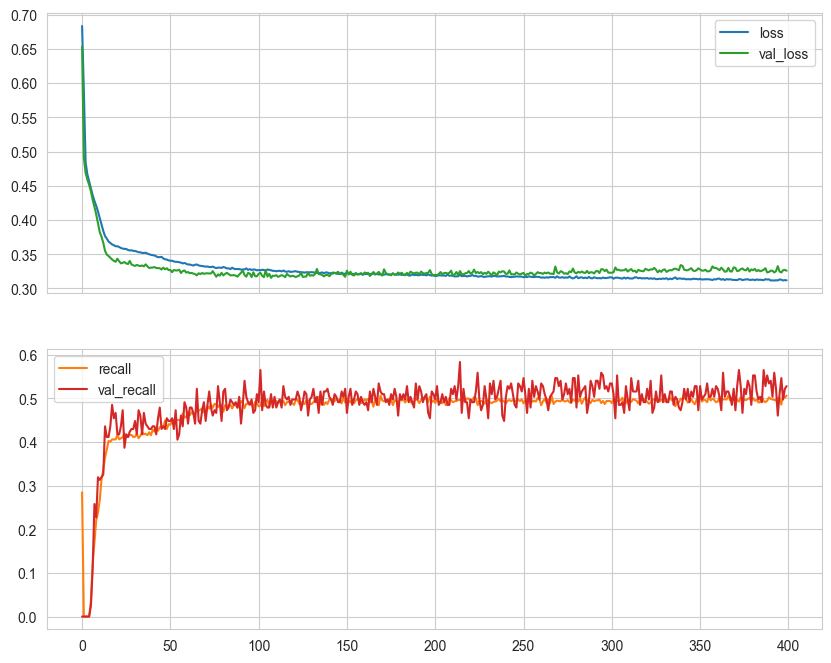

In [84]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [85]:
model.evaluate(X_test, y_test, verbose=0)

[0.3437725603580475, 0.488943487405777]

In [86]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3437725603580475
recall :  0.488943487405777


In [87]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1530   63]
 [ 208  199]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.76      0.49      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [88]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

63/63 [==============================] - 0s 1ms/step


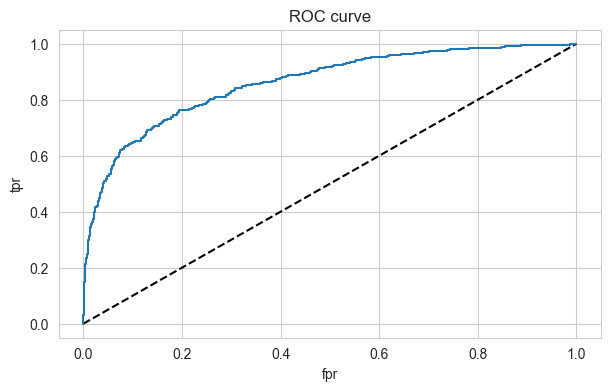

In [89]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [90]:
roc_auc_score(y_test, y_pred_proba)

0.8603225721869789

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [91]:
tf.random.set_seed(42)

model1 = Sequential()

model1.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model1.add(Dense(9, activation = "relu"))
model1.add(Dense(4, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))
model1.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [92]:
from sklearn.utils import class_weight

In [93]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [94]:
model1.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size= 60, 
          epochs=400,
          verbose=1,
         class_weight=class_weights
         )

Epoch 1/400
120/120 [==============================] - 2s 6ms/step - loss: 0.6849 - recall: 0.8016 - val_loss: 0.7110 - val_recall: 0.8957
Epoch 2/400
120/120 [==============================] - 0s 3ms/step - loss: 0.6603 - recall: 0.8275 - val_loss: 0.6857 - val_recall: 0.7791
Epoch 3/400
120/120 [==============================] - 0s 3ms/step - loss: 0.6264 - recall: 0.7157 - val_loss: 0.6360 - val_recall: 0.7117
Epoch 4/400
120/120 [==============================] - 0s 2ms/step - loss: 0.6028 - recall: 0.6776 - val_loss: 0.5647 - val_recall: 0.6258
Epoch 5/400
120/120 [==============================] - 0s 2ms/step - loss: 0.5911 - recall: 0.6810 - val_loss: 0.5451 - val_recall: 0.6258
Epoch 6/400
120/120 [==============================] - 0s 3ms/step - loss: 0.5824 - recall: 0.6892 - val_loss: 0.5141 - val_recall: 0.6135
Epoch 7/400
120/120 [==============================] - 0s 2ms/step - loss: 0.5726 - recall: 0.6973 - val_loss: 0.4994 - val_recall: 0.6135
Epoch 8/400
120/120 [======

120/120 [==============================] - 0s 3ms/step - loss: 0.4603 - recall: 0.7655 - val_loss: 0.4876 - val_recall: 0.8098
Epoch 60/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4583 - recall: 0.7682 - val_loss: 0.4309 - val_recall: 0.7546
Epoch 61/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4559 - recall: 0.7751 - val_loss: 0.3925 - val_recall: 0.7117
Epoch 62/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4565 - recall: 0.7778 - val_loss: 0.4179 - val_recall: 0.7669
Epoch 63/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4552 - recall: 0.7682 - val_loss: 0.4763 - val_recall: 0.7975
Epoch 64/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4547 - recall: 0.7771 - val_loss: 0.4225 - val_recall: 0.7607
Epoch 65/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4559 - recall: 0.7703 - val_loss: 0.4109 - val_recall: 0.7485
Epoch 66/400
120/120 [===========

120/120 [==============================] - 0s 3ms/step - loss: 0.4416 - recall: 0.7812 - val_loss: 0.4331 - val_recall: 0.7607
Epoch 118/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4429 - recall: 0.7846 - val_loss: 0.4463 - val_recall: 0.7791
Epoch 119/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4405 - recall: 0.7839 - val_loss: 0.3924 - val_recall: 0.7239
Epoch 120/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4415 - recall: 0.7785 - val_loss: 0.3933 - val_recall: 0.7178
Epoch 121/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4433 - recall: 0.7798 - val_loss: 0.4330 - val_recall: 0.7546
Epoch 122/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4429 - recall: 0.7771 - val_loss: 0.4570 - val_recall: 0.7914
Epoch 123/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4409 - recall: 0.7846 - val_loss: 0.3936 - val_recall: 0.7117
Epoch 124/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.4328 - recall: 0.7860 - val_loss: 0.3925 - val_recall: 0.7178
Epoch 176/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4339 - recall: 0.7825 - val_loss: 0.4107 - val_recall: 0.7301
Epoch 177/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4351 - recall: 0.7873 - val_loss: 0.4225 - val_recall: 0.7423
Epoch 178/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4341 - recall: 0.7914 - val_loss: 0.4061 - val_recall: 0.7301
Epoch 179/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4339 - recall: 0.7839 - val_loss: 0.3737 - val_recall: 0.6564
Epoch 180/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4328 - recall: 0.7907 - val_loss: 0.4764 - val_recall: 0.7791
Epoch 181/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4339 - recall: 0.7866 - val_loss: 0.4600 - val_recall: 0.7607
Epoch 182/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.4276 - recall: 0.7914 - val_loss: 0.4120 - val_recall: 0.7423
Epoch 234/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4280 - recall: 0.7941 - val_loss: 0.4477 - val_recall: 0.7669
Epoch 235/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4310 - recall: 0.7860 - val_loss: 0.5002 - val_recall: 0.8037
Epoch 236/400
120/120 [==============================] - 0s 4ms/step - loss: 0.4262 - recall: 0.7948 - val_loss: 0.4434 - val_recall: 0.7730
Epoch 237/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4286 - recall: 0.7887 - val_loss: 0.4172 - val_recall: 0.7362
Epoch 238/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4270 - recall: 0.7941 - val_loss: 0.4211 - val_recall: 0.7362
Epoch 239/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4274 - recall: 0.7921 - val_loss: 0.3856 - val_recall: 0.7362
Epoch 240/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.4263 - recall: 0.7975 - val_loss: 0.4595 - val_recall: 0.7853
Epoch 292/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4222 - recall: 0.7853 - val_loss: 0.4798 - val_recall: 0.7975
Epoch 293/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4251 - recall: 0.7907 - val_loss: 0.4583 - val_recall: 0.7669
Epoch 294/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4213 - recall: 0.7914 - val_loss: 0.4004 - val_recall: 0.7362
Epoch 295/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4210 - recall: 0.7914 - val_loss: 0.4590 - val_recall: 0.7669
Epoch 296/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4237 - recall: 0.7935 - val_loss: 0.4887 - val_recall: 0.7914
Epoch 297/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4228 - recall: 0.7839 - val_loss: 0.4312 - val_recall: 0.7546
Epoch 298/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.4211 - recall: 0.8064 - val_loss: 0.4155 - val_recall: 0.7362
Epoch 350/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4184 - recall: 0.7989 - val_loss: 0.3842 - val_recall: 0.6994
Epoch 351/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4220 - recall: 0.7907 - val_loss: 0.4289 - val_recall: 0.7546
Epoch 352/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4193 - recall: 0.7982 - val_loss: 0.4342 - val_recall: 0.7485
Epoch 353/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4190 - recall: 0.7935 - val_loss: 0.4290 - val_recall: 0.7669
Epoch 354/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4190 - recall: 0.7989 - val_loss: 0.4633 - val_recall: 0.7791
Epoch 355/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4205 - recall: 0.8010 - val_loss: 0.3974 - val_recall: 0.7423
Epoch 356/400
120/120 [====

In [95]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.685,0.802,0.711,0.896
1,0.660,0.828,0.686,0.779
2,0.626,0.716,0.636,0.712
3,0.603,0.678,0.565,0.626
4,0.591,0.681,0.545,0.626


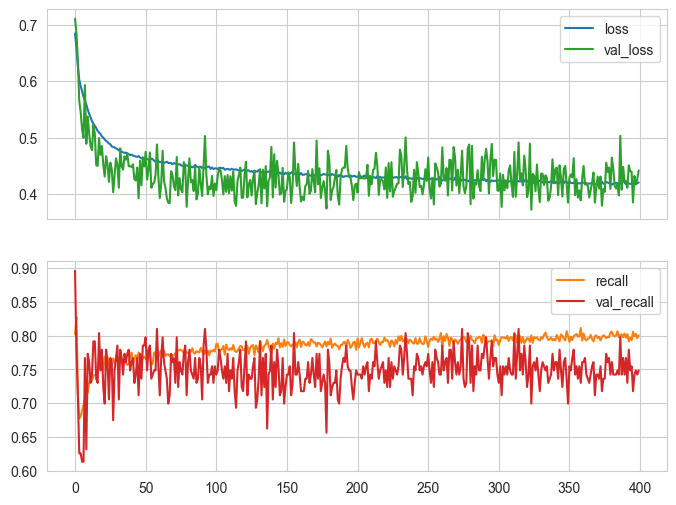

In [96]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(8,6))
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [97]:
model1.evaluate(X_test, y_test, verbose=0)

[0.482729434967041, 0.7542997598648071]

In [98]:
loss, recall = model1.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.482729434967041
recall :  0.7542997598648071


In [99]:
y_pred = model1.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1222  371]
 [ 100  307]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1593
           1       0.45      0.75      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



63/63 [==============================] - 0s 2ms/step


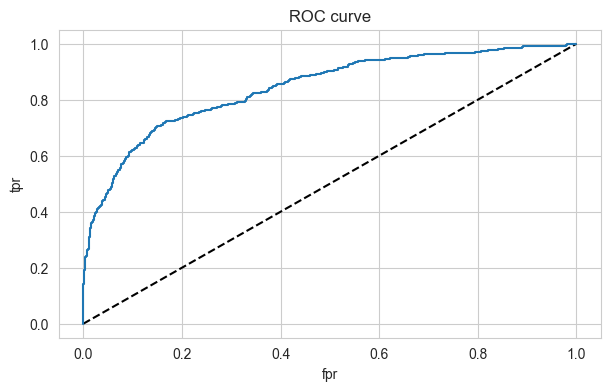

In [100]:
y_pred_proba = model1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [101]:
roc_auc_score(y_test, y_pred_proba)

0.8431713685950974

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [102]:
from tensorflow.keras.optimizers import Adam

In [127]:
tf.keras.utils.set_random_seed(42)


model2 = Sequential()

model2.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model2.add(Dense(9, activation = "relu"))
model2.add(Dense(4, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.0035)

In [128]:
model2.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [129]:
model2.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size= 60, 
          epochs=400,
          verbose=1)

Epoch 1/400
120/120 [==============================] - 2s 5ms/step - loss: 0.5965 - recall: 0.0798 - val_loss: 0.4831 - val_recall: 0.0000e+00
Epoch 2/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4672 - recall: 0.0000e+00 - val_loss: 0.4561 - val_recall: 0.0000e+00
Epoch 3/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4505 - recall: 0.0000e+00 - val_loss: 0.4389 - val_recall: 0.0000e+00
Epoch 4/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4371 - recall: 0.1179 - val_loss: 0.4154 - val_recall: 0.2393
Epoch 5/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4285 - recall: 0.2563 - val_loss: 0.4073 - val_recall: 0.2577
Epoch 6/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4161 - recall: 0.2774 - val_loss: 0.3840 - val_recall: 0.2822
Epoch 7/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4053 - recall: 0.2952 - val_loss: 0.3722 - val_recall: 0.2945
Epoch 8

120/120 [==============================] - 1s 4ms/step - loss: 0.3371 - recall: 0.4363 - val_loss: 0.3360 - val_recall: 0.4724
Epoch 60/400
120/120 [==============================] - 0s 4ms/step - loss: 0.3340 - recall: 0.4308 - val_loss: 0.3296 - val_recall: 0.4540
Epoch 61/400
120/120 [==============================] - 1s 4ms/step - loss: 0.3332 - recall: 0.4335 - val_loss: 0.3335 - val_recall: 0.3926
Epoch 62/400
120/120 [==============================] - 0s 4ms/step - loss: 0.3324 - recall: 0.4383 - val_loss: 0.3443 - val_recall: 0.4601
Epoch 63/400
120/120 [==============================] - 0s 4ms/step - loss: 0.3321 - recall: 0.4438 - val_loss: 0.3391 - val_recall: 0.5215
Epoch 64/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3330 - recall: 0.4356 - val_loss: 0.3281 - val_recall: 0.4417
Epoch 65/400
120/120 [==============================] - 1s 4ms/step - loss: 0.3330 - recall: 0.4444 - val_loss: 0.3332 - val_recall: 0.4356
Epoch 66/400
120/120 [===========

120/120 [==============================] - 0s 2ms/step - loss: 0.3241 - recall: 0.4615 - val_loss: 0.3387 - val_recall: 0.4294
Epoch 118/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3231 - recall: 0.4547 - val_loss: 0.3411 - val_recall: 0.4663
Epoch 119/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3231 - recall: 0.4526 - val_loss: 0.3401 - val_recall: 0.4110
Epoch 120/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3217 - recall: 0.4479 - val_loss: 0.3405 - val_recall: 0.4233
Epoch 121/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3238 - recall: 0.4513 - val_loss: 0.3381 - val_recall: 0.4724
Epoch 122/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3240 - recall: 0.4479 - val_loss: 0.3401 - val_recall: 0.5092
Epoch 123/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3216 - recall: 0.4581 - val_loss: 0.3364 - val_recall: 0.4356
Epoch 124/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.3178 - recall: 0.4676 - val_loss: 0.3490 - val_recall: 0.3681
Epoch 176/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3181 - recall: 0.4601 - val_loss: 0.3403 - val_recall: 0.4724
Epoch 177/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3180 - recall: 0.4574 - val_loss: 0.3429 - val_recall: 0.4417
Epoch 178/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3179 - recall: 0.4635 - val_loss: 0.3458 - val_recall: 0.3926
Epoch 179/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3209 - recall: 0.4499 - val_loss: 0.3541 - val_recall: 0.3558
Epoch 180/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3182 - recall: 0.4513 - val_loss: 0.3424 - val_recall: 0.4540
Epoch 181/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3184 - recall: 0.4635 - val_loss: 0.3397 - val_recall: 0.4601
Epoch 182/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.3127 - recall: 0.4628 - val_loss: 0.3438 - val_recall: 0.4847
Epoch 234/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3119 - recall: 0.4772 - val_loss: 0.3582 - val_recall: 0.4969
Epoch 235/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3158 - recall: 0.4574 - val_loss: 0.3612 - val_recall: 0.5153
Epoch 236/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3129 - recall: 0.4642 - val_loss: 0.3436 - val_recall: 0.5092
Epoch 237/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3137 - recall: 0.4710 - val_loss: 0.3488 - val_recall: 0.4294
Epoch 238/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3130 - recall: 0.4608 - val_loss: 0.3513 - val_recall: 0.4417
Epoch 239/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3158 - recall: 0.4642 - val_loss: 0.3507 - val_recall: 0.4233
Epoch 240/400
120/120 [====

120/120 [==============================] - 0s 2ms/step - loss: 0.3098 - recall: 0.4663 - val_loss: 0.3621 - val_recall: 0.4847
Epoch 292/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3095 - recall: 0.4724 - val_loss: 0.3583 - val_recall: 0.4969
Epoch 293/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3085 - recall: 0.4683 - val_loss: 0.3547 - val_recall: 0.4908
Epoch 294/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3099 - recall: 0.4683 - val_loss: 0.3594 - val_recall: 0.4417
Epoch 295/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3068 - recall: 0.4765 - val_loss: 0.3594 - val_recall: 0.4785
Epoch 296/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3104 - recall: 0.4703 - val_loss: 0.3522 - val_recall: 0.4847
Epoch 297/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3097 - recall: 0.4635 - val_loss: 0.3601 - val_recall: 0.4601
Epoch 298/400
120/120 [====

120/120 [==============================] - 0s 2ms/step - loss: 0.3069 - recall: 0.4635 - val_loss: 0.3624 - val_recall: 0.4479
Epoch 350/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3060 - recall: 0.4772 - val_loss: 0.3739 - val_recall: 0.4233
Epoch 351/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3078 - recall: 0.4690 - val_loss: 0.3658 - val_recall: 0.4663
Epoch 352/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3115 - recall: 0.4690 - val_loss: 0.3765 - val_recall: 0.3865
Epoch 353/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3063 - recall: 0.4676 - val_loss: 0.3640 - val_recall: 0.4663
Epoch 354/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3053 - recall: 0.4738 - val_loss: 0.3657 - val_recall: 0.4724
Epoch 355/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3087 - recall: 0.4744 - val_loss: 0.3614 - val_recall: 0.4356
Epoch 356/400
120/120 [====

In [130]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.596,0.080,0.483,0.000
1,0.467,0.000,0.456,0.000
2,0.450,0.000,0.439,0.000
3,0.437,0.118,0.415,0.239
4,0.429,0.256,0.407,0.258


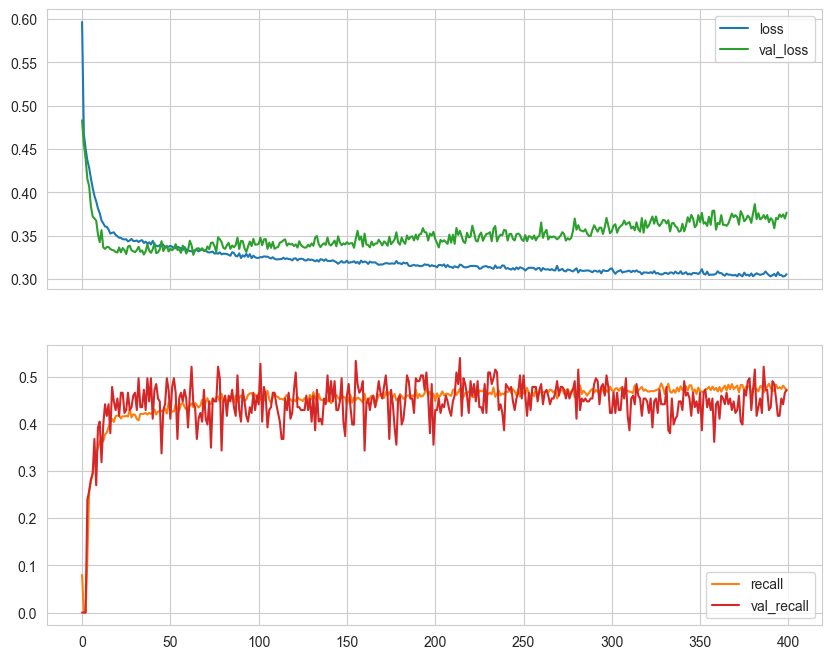

In [131]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [132]:
model2.evaluate(X_test, y_test, verbose=0)

[0.3810119330883026, 0.4447174370288849]

In [133]:
loss, recall = model2.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3810119330883026
recall :  0.4447174370288849


In [134]:
y_pred = model2.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1529   64]
 [ 226  181]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.44      0.56       407

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



### Add Dropout Layer

In [136]:
from tensorflow.keras.layers import Dropout

In [140]:
tf.keras.utils.set_random_seed(42)

model3 = Sequential()

model3.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))

model3.add(Dense(9, activation="relu"))
model3.add(Dropout(0.2))

model3.add(Dense(4, activation="relu"))
model3.add(Dropout(0.2))

model3.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.0035)
model3.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [141]:
model3.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size= 60, 
          epochs=400,
          verbose=1)

Epoch 1/400
120/120 [==============================] - 3s 6ms/step - loss: 0.6166 - recall: 0.0709 - val_loss: 0.5001 - val_recall: 0.0000e+00
Epoch 2/400
120/120 [==============================] - 0s 2ms/step - loss: 0.5086 - recall: 0.0000e+00 - val_loss: 0.4711 - val_recall: 0.0000e+00
Epoch 3/400
120/120 [==============================] - 0s 2ms/step - loss: 0.4952 - recall: 0.0000e+00 - val_loss: 0.4689 - val_recall: 0.0000e+00
Epoch 4/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4843 - recall: 0.0034 - val_loss: 0.4466 - val_recall: 0.0000e+00
Epoch 5/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4799 - recall: 0.0382 - val_loss: 0.4476 - val_recall: 0.0000e+00
Epoch 6/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4654 - recall: 0.0675 - val_loss: 0.4328 - val_recall: 0.0184
Epoch 7/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4535 - recall: 0.1670 - val_loss: 0.4195 - val_recall: 0.0859

120/120 [==============================] - 0s 3ms/step - loss: 0.3875 - recall: 0.3408 - val_loss: 0.3389 - val_recall: 0.4417
Epoch 60/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3869 - recall: 0.3470 - val_loss: 0.3322 - val_recall: 0.4172
Epoch 61/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3831 - recall: 0.3551 - val_loss: 0.3426 - val_recall: 0.3436
Epoch 62/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3865 - recall: 0.3497 - val_loss: 0.3353 - val_recall: 0.4601
Epoch 63/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3787 - recall: 0.3586 - val_loss: 0.3379 - val_recall: 0.4172
Epoch 64/400
120/120 [==============================] - 0s 4ms/step - loss: 0.3852 - recall: 0.3306 - val_loss: 0.3347 - val_recall: 0.4233
Epoch 65/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3796 - recall: 0.3613 - val_loss: 0.3338 - val_recall: 0.4294
Epoch 66/400
120/120 [===========

120/120 [==============================] - 0s 3ms/step - loss: 0.3827 - recall: 0.3586 - val_loss: 0.3446 - val_recall: 0.3988
Epoch 118/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3786 - recall: 0.3715 - val_loss: 0.3381 - val_recall: 0.4356
Epoch 119/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3824 - recall: 0.3470 - val_loss: 0.3277 - val_recall: 0.4601
Epoch 120/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3811 - recall: 0.3449 - val_loss: 0.3448 - val_recall: 0.3865
Epoch 121/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3829 - recall: 0.3483 - val_loss: 0.3374 - val_recall: 0.3865
Epoch 122/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3801 - recall: 0.3361 - val_loss: 0.3330 - val_recall: 0.4110
Epoch 123/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3835 - recall: 0.3340 - val_loss: 0.3385 - val_recall: 0.4110
Epoch 124/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.3838 - recall: 0.3538 - val_loss: 0.3384 - val_recall: 0.3497
Epoch 176/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3856 - recall: 0.3436 - val_loss: 0.3354 - val_recall: 0.4110
Epoch 177/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3736 - recall: 0.3715 - val_loss: 0.3350 - val_recall: 0.4172
Epoch 178/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3753 - recall: 0.3504 - val_loss: 0.3329 - val_recall: 0.4233
Epoch 179/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3783 - recall: 0.3620 - val_loss: 0.3374 - val_recall: 0.3865
Epoch 180/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3756 - recall: 0.3708 - val_loss: 0.3405 - val_recall: 0.3558
Epoch 181/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3785 - recall: 0.3606 - val_loss: 0.3355 - val_recall: 0.3681
Epoch 182/400
120/120 [====

120/120 [==============================] - 0s 2ms/step - loss: 0.3782 - recall: 0.3667 - val_loss: 0.3277 - val_recall: 0.4663
Epoch 234/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3809 - recall: 0.3511 - val_loss: 0.3348 - val_recall: 0.3926
Epoch 235/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3748 - recall: 0.3661 - val_loss: 0.3355 - val_recall: 0.4172
Epoch 236/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3770 - recall: 0.3654 - val_loss: 0.3333 - val_recall: 0.3926
Epoch 237/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3804 - recall: 0.3654 - val_loss: 0.3298 - val_recall: 0.4847
Epoch 238/400
120/120 [==============================] - 0s 2ms/step - loss: 0.3723 - recall: 0.3831 - val_loss: 0.3440 - val_recall: 0.4110
Epoch 239/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3765 - recall: 0.3804 - val_loss: 0.3421 - val_recall: 0.3681
Epoch 240/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.3723 - recall: 0.3640 - val_loss: 0.3285 - val_recall: 0.3988
Epoch 292/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3721 - recall: 0.3517 - val_loss: 0.3260 - val_recall: 0.4479
Epoch 293/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3697 - recall: 0.3715 - val_loss: 0.3259 - val_recall: 0.4601
Epoch 294/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3761 - recall: 0.3490 - val_loss: 0.3283 - val_recall: 0.4356
Epoch 295/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3731 - recall: 0.3708 - val_loss: 0.3297 - val_recall: 0.4601
Epoch 296/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3728 - recall: 0.3517 - val_loss: 0.3235 - val_recall: 0.4785
Epoch 297/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3761 - recall: 0.3592 - val_loss: 0.3294 - val_recall: 0.4110
Epoch 298/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.3706 - recall: 0.3790 - val_loss: 0.3293 - val_recall: 0.4110
Epoch 350/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3730 - recall: 0.3483 - val_loss: 0.3388 - val_recall: 0.3926
Epoch 351/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3665 - recall: 0.3674 - val_loss: 0.3294 - val_recall: 0.4356
Epoch 352/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3754 - recall: 0.3688 - val_loss: 0.3311 - val_recall: 0.4356
Epoch 353/400
120/120 [==============================] - 0s 4ms/step - loss: 0.3781 - recall: 0.3483 - val_loss: 0.3435 - val_recall: 0.3497
Epoch 354/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3735 - recall: 0.3667 - val_loss: 0.3412 - val_recall: 0.3988
Epoch 355/400
120/120 [==============================] - 0s 3ms/step - loss: 0.3717 - recall: 0.3592 - val_loss: 0.3292 - val_recall: 0.4847
Epoch 356/400
120/120 [====

In [142]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.617,0.071,0.500,0.000
1,0.509,0.000,0.471,0.000
2,0.495,0.000,0.469,0.000
3,0.484,0.003,0.447,0.000
4,0.480,0.038,0.448,0.000


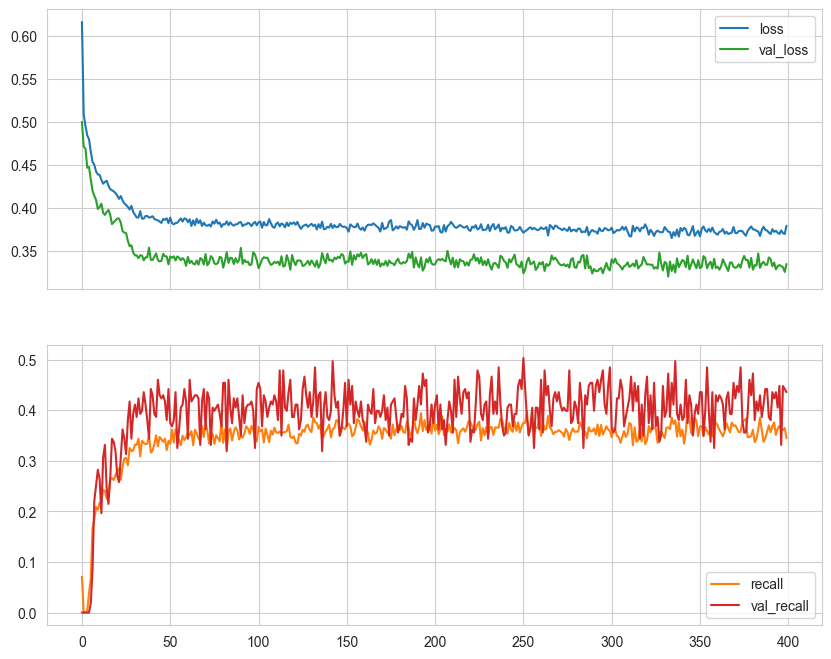

In [143]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [144]:
loss, recall = model3.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3389585614204407
recall :  0.4299754202365875


In [145]:
y_pred = model3.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1564   29]
 [ 232  175]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.86      0.43      0.57       407

    accuracy                           0.87      2000
   macro avg       0.86      0.71      0.75      2000
weighted avg       0.87      0.87      0.85      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [146]:
from tensorflow.keras.callbacks import EarlyStopping

In [147]:
early_stop = EarlyStopping(monitor = "val_loss", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 25, 
                           restore_best_weights = True)


In [151]:
tf.keras.utils.set_random_seed(42)

model4 = Sequential()

model4.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model4.add(Dense(9, activation="relu"))
model4.add(Dense(4, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.0035)
model4.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [152]:
model4.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size = 60,
    epochs=400,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights    
)

Epoch 1/400
120/120 [==============================] - 2s 6ms/step - loss: 0.6772 - recall: 0.8166 - val_loss: 0.7374 - val_recall: 0.7485
Epoch 2/400
120/120 [==============================] - 0s 3ms/step - loss: 0.6281 - recall: 0.7103 - val_loss: 0.6542 - val_recall: 0.6871
Epoch 3/400
120/120 [==============================] - 0s 3ms/step - loss: 0.5879 - recall: 0.6892 - val_loss: 0.5948 - val_recall: 0.7117
Epoch 4/400
120/120 [==============================] - 0s 3ms/step - loss: 0.5543 - recall: 0.6823 - val_loss: 0.5765 - val_recall: 0.7301
Epoch 5/400
120/120 [==============================] - 0s 3ms/step - loss: 0.5320 - recall: 0.7028 - val_loss: 0.5283 - val_recall: 0.7239
Epoch 6/400
120/120 [==============================] - 0s 3ms/step - loss: 0.5175 - recall: 0.7151 - val_loss: 0.4895 - val_recall: 0.6994
Epoch 7/400
120/120 [==============================] - 0s 3ms/step - loss: 0.5068 - recall: 0.7117 - val_loss: 0.4588 - val_recall: 0.7178
Epoch 8/400
120/120 [======

120/120 [==============================] - 0s 3ms/step - loss: 0.4442 - recall: 0.7716 - val_loss: 0.4762 - val_recall: 0.7546
Epoch 60/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4396 - recall: 0.7710 - val_loss: 0.4320 - val_recall: 0.7055
Epoch 61/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4382 - recall: 0.7601 - val_loss: 0.4253 - val_recall: 0.7178
Epoch 62/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4378 - recall: 0.7641 - val_loss: 0.4601 - val_recall: 0.7362
Epoch 63/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4363 - recall: 0.7621 - val_loss: 0.5272 - val_recall: 0.7914
Epoch 64/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4375 - recall: 0.7812 - val_loss: 0.4328 - val_recall: 0.7055
Epoch 65/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4377 - recall: 0.7696 - val_loss: 0.4418 - val_recall: 0.7178
Epoch 66/400
120/120 [===========

In [153]:
loss_df = pd.DataFrame(model4.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.677,0.817,0.737,0.748
1,0.628,0.710,0.654,0.687
2,0.588,0.689,0.595,0.712
3,0.554,0.682,0.577,0.730
4,0.532,0.703,0.528,0.724


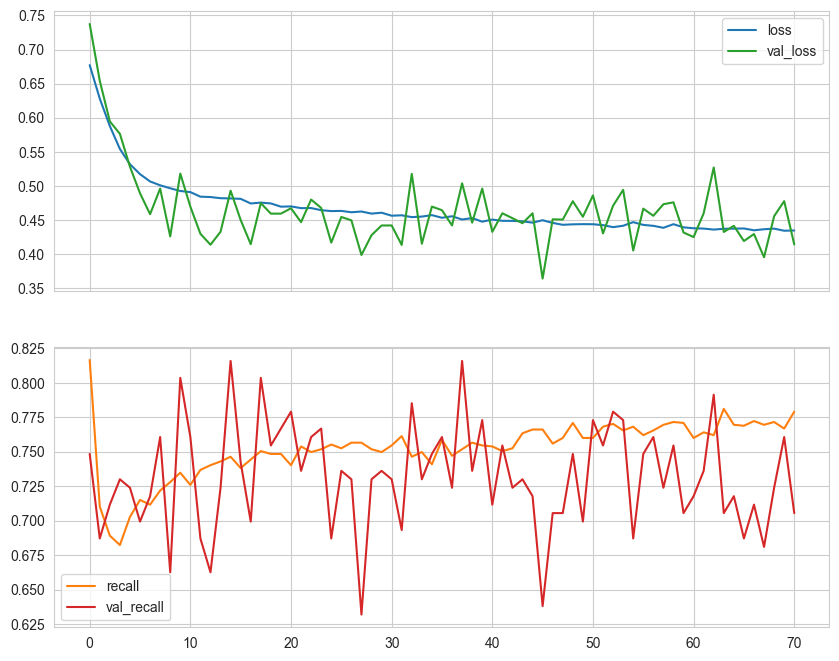

In [154]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [155]:
loss, recall = model4.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.38455435633659363
recall :  0.6486486196517944


In [156]:
y_pred = model4.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1418  175]
 [ 143  264]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.60      0.65      0.62       407

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.85      0.84      0.84      2000



#### Monitor the "val_recall" as metric

In [138]:
early_stop = EarlyStopping(monitor = "val_recall", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 25, 
                           restore_best_weights = True)


In [157]:
tf.keras.utils.set_random_seed(42)

model5 = Sequential()

model5.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model5.add(Dense(9, activation="relu"))
model5.add(Dense(4, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.0035)
model5.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [158]:
model5.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=60,
    epochs=400,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights    
)

Epoch 1/400
120/120 [==============================] - 2s 6ms/step - loss: 0.6772 - recall: 0.8166 - val_loss: 0.7374 - val_recall: 0.7485
Epoch 2/400
120/120 [==============================] - 0s 3ms/step - loss: 0.6281 - recall: 0.7103 - val_loss: 0.6542 - val_recall: 0.6871
Epoch 3/400
120/120 [==============================] - 0s 3ms/step - loss: 0.5879 - recall: 0.6892 - val_loss: 0.5948 - val_recall: 0.7117
Epoch 4/400
120/120 [==============================] - 0s 3ms/step - loss: 0.5543 - recall: 0.6823 - val_loss: 0.5765 - val_recall: 0.7301
Epoch 5/400
120/120 [==============================] - 0s 4ms/step - loss: 0.5320 - recall: 0.7028 - val_loss: 0.5283 - val_recall: 0.7239
Epoch 6/400
120/120 [==============================] - 0s 3ms/step - loss: 0.5175 - recall: 0.7151 - val_loss: 0.4895 - val_recall: 0.6994
Epoch 7/400
120/120 [==============================] - 0s 3ms/step - loss: 0.5068 - recall: 0.7117 - val_loss: 0.4588 - val_recall: 0.7178
Epoch 8/400
120/120 [======

120/120 [==============================] - 0s 3ms/step - loss: 0.4442 - recall: 0.7716 - val_loss: 0.4762 - val_recall: 0.7546
Epoch 60/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4396 - recall: 0.7710 - val_loss: 0.4320 - val_recall: 0.7055
Epoch 61/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4382 - recall: 0.7601 - val_loss: 0.4253 - val_recall: 0.7178
Epoch 62/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4378 - recall: 0.7641 - val_loss: 0.4601 - val_recall: 0.7362
Epoch 63/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4363 - recall: 0.7621 - val_loss: 0.5272 - val_recall: 0.7914
Epoch 64/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4375 - recall: 0.7812 - val_loss: 0.4328 - val_recall: 0.7055
Epoch 65/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4377 - recall: 0.7696 - val_loss: 0.4418 - val_recall: 0.7178
Epoch 66/400
120/120 [===========

In [159]:
loss_df = pd.DataFrame(model5.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.677,0.817,0.737,0.748
1,0.628,0.710,0.654,0.687
2,0.588,0.689,0.595,0.712
3,0.554,0.682,0.577,0.730
4,0.532,0.703,0.528,0.724


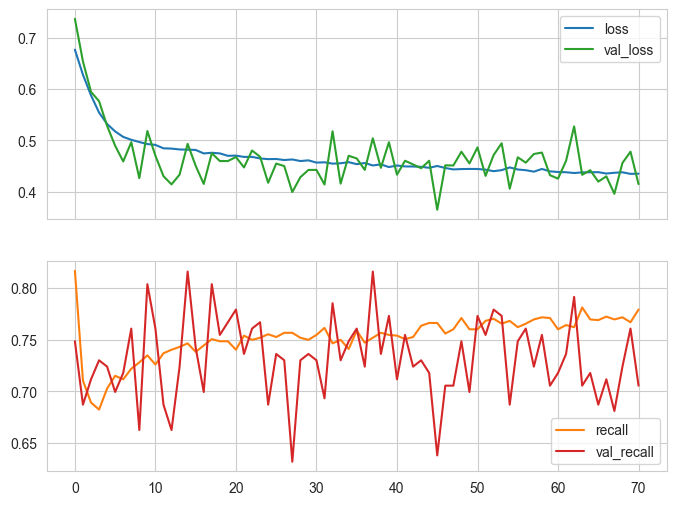

In [160]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(8,6))
plt.show()

In [161]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3437725603580475
recall :  0.488943487405777


In [162]:
y_pred = model5.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1418  175]
 [ 143  264]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.60      0.65      0.62       407

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.85      0.84      0.84      2000



## Optuna

In [163]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [164]:
import optuna
from tensorflow.keras.regularizers import l1, l2, L1L2

In [165]:
early_stop = EarlyStopping(monitor = "val_recall", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 25, 
                           restore_best_weights = True)

In [168]:
trial_metric = "Recall"
batch_size = 60

In [169]:
def create_model(trial):
    
    n_units1 = trial.suggest_int("n_units1", 64, 128) 
    n_units2 = trial.suggest_int("n_units2", 16, 64)  
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) 
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    

    tf.keras.utils.set_random_seed(42)
    model6 = Sequential()
    model6.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model6.add(Dropout(dropout))
    model6.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model6.add(Dropout(dropout))
    model6.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model6.add(Dropout(dropout))
    model6.add(Dense(1, activation="sigmoid"))
   



    model6.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model6 = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) 
    w1 = trial.suggest_loguniform("w1", 0.01, 2) 
                                                 
    model6.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=400,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model6.evaluate(X_test, y_test, verbose=0)[1]

In [170]:
study = optuna.create_study(direction="maximize") 
study.optimize(objective, n_trials=15) 
display(study.best_params)

[I 2023-05-18 10:48:38,326] A new study created in memory with name: no-name-2c43c8ee-cb1c-412c-a7d9-a3802f810fc3


Restoring model weights from the end of the best epoch: 21.
Epoch 46: early stopping


[I 2023-05-18 10:48:53,433] Trial 0 finished with value: 0.09090909361839294 and parameters: {'n_units1': 85, 'n_units2': 51, 'n_units3': 17, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.026433868995691938, 'regularizer1': 0.0005631096604515868, 'regularizer2': 0.000692325354424696, 'dropout': 0.3, 'w0': 2.072034925586033, 'w1': 0.10779629561264677}. Best is trial 0 with value: 0.09090909361839294.


Restoring model weights from the end of the best epoch: 2.
Epoch 27: early stopping


[I 2023-05-18 10:49:01,816] Trial 1 finished with value: 0.17690417170524597 and parameters: {'n_units1': 109, 'n_units2': 31, 'n_units3': 24, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.03383833401656336, 'regularizer1': 6.521891069496639e-05, 'regularizer2': 0.00040198457357517014, 'dropout': 0.5, 'w0': 2.259618080868765, 'w1': 0.42188294389931236}. Best is trial 1 with value: 0.17690417170524597.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-18 10:49:09,729] Trial 2 finished with value: 0.46437346935272217 and parameters: {'n_units1': 96, 'n_units2': 16, 'n_units3': 20, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.05836637964665531, 'regularizer1': 1.0289429686928427e-05, 'regularizer2': 0.0001885727800363674, 'dropout': 0, 'w0': 0.014673309008243433, 'w1': 0.025738831260153548}. Best is trial 2 with value: 0.46437346935272217.


Restoring model weights from the end of the best epoch: 28.
Epoch 53: early stopping


[I 2023-05-18 10:49:24,429] Trial 3 finished with value: 0.7272727489471436 and parameters: {'n_units1': 86, 'n_units2': 35, 'n_units3': 44, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.02297964082944677, 'regularizer1': 7.288186473161994e-05, 'regularizer2': 0.00018558219401052807, 'dropout': 0.5, 'w0': 0.15852140556256755, 'w1': 0.6135414996724452}. Best is trial 3 with value: 0.7272727489471436.


Restoring model weights from the end of the best epoch: 42.
Epoch 67: early stopping


[I 2023-05-18 10:49:44,049] Trial 4 finished with value: 0.6461916565895081 and parameters: {'n_units1': 114, 'n_units2': 60, 'n_units3': 46, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0003634366559053694, 'regularizer1': 0.0008271334102406309, 'regularizer2': 0.000679130515732752, 'dropout': 0, 'w0': 0.011777477427472535, 'w1': 0.02538821510829557}. Best is trial 3 with value: 0.7272727489471436.


Restoring model weights from the end of the best epoch: 2.
Epoch 27: early stopping


[I 2023-05-18 10:49:52,753] Trial 5 finished with value: 0.39066338539123535 and parameters: {'n_units1': 70, 'n_units2': 40, 'n_units3': 58, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0007993057588942745, 'regularizer1': 0.0004472533898254856, 'regularizer2': 6.066764847732067e-05, 'dropout': 0.5, 'w0': 0.03301443499417978, 'w1': 0.03114830559014182}. Best is trial 3 with value: 0.7272727489471436.


Restoring model weights from the end of the best epoch: 2.
Epoch 27: early stopping


[I 2023-05-18 10:50:01,202] Trial 6 finished with value: 0.5085995197296143 and parameters: {'n_units1': 125, 'n_units2': 25, 'n_units3': 62, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0002648455654419443, 'regularizer1': 0.0008734784047161226, 'regularizer2': 0.00010149917442594055, 'dropout': 0.3, 'w0': 0.09306053873994573, 'w1': 0.15186546363869202}. Best is trial 3 with value: 0.7272727489471436.


Restoring model weights from the end of the best epoch: 13.
Epoch 38: early stopping


[I 2023-05-18 10:50:12,582] Trial 7 finished with value: 0.914004921913147 and parameters: {'n_units1': 76, 'n_units2': 31, 'n_units3': 40, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00017731491950518188, 'regularizer1': 6.422992976321398e-05, 'regularizer2': 0.000688771851570703, 'dropout': 0, 'w0': 0.06326022984853197, 'w1': 1.274431954850001}. Best is trial 7 with value: 0.914004921913147.


Restoring model weights from the end of the best epoch: 27.
Epoch 52: early stopping


[I 2023-05-18 10:50:26,218] Trial 8 finished with value: 0.525798499584198 and parameters: {'n_units1': 103, 'n_units2': 24, 'n_units3': 44, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0014915264392226337, 'regularizer1': 0.00012634463949847332, 'regularizer2': 6.338522633709482e-05, 'dropout': 0, 'w0': 0.047487676945880235, 'w1': 0.07761758209350318}. Best is trial 7 with value: 0.914004921913147.


Restoring model weights from the end of the best epoch: 21.
Epoch 46: early stopping


[I 2023-05-18 10:50:38,447] Trial 9 finished with value: 0.2309582382440567 and parameters: {'n_units1': 120, 'n_units2': 20, 'n_units3': 29, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 1.6712267002752222e-05, 'regularizer1': 0.0007443757828365427, 'regularizer2': 6.459284613817203e-05, 'dropout': 0.5, 'w0': 3.843809219300936, 'w1': 1.0890524447294485}. Best is trial 7 with value: 0.914004921913147.


Restoring model weights from the end of the best epoch: 27.
Epoch 52: early stopping


[I 2023-05-18 10:50:52,876] Trial 10 finished with value: 0.6683046817779541 and parameters: {'n_units1': 66, 'n_units2': 51, 'n_units3': 34, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 1.4398693163275188e-05, 'regularizer1': 2.929623608281125e-05, 'regularizer2': 1.6814362076792653e-05, 'dropout': 0, 'w0': 0.5284146950375351, 'w1': 1.8287992179548165}. Best is trial 7 with value: 0.914004921913147.


Restoring model weights from the end of the best epoch: 27.
Epoch 52: early stopping


[I 2023-05-18 10:51:09,002] Trial 11 finished with value: 0.7076166868209839 and parameters: {'n_units1': 81, 'n_units2': 35, 'n_units3': 52, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.005824088277412881, 'regularizer1': 0.00011513728094934812, 'regularizer2': 0.00029526709386998036, 'dropout': 0.5, 'w0': 0.18854729077842972, 'w1': 0.6928281354895014}. Best is trial 7 with value: 0.914004921913147.


Restoring model weights from the end of the best epoch: 25.
Epoch 50: early stopping


[I 2023-05-18 10:51:23,823] Trial 12 finished with value: 0.47174447774887085 and parameters: {'n_units1': 83, 'n_units2': 32, 'n_units3': 37, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.007265299869347647, 'regularizer1': 5.087523456749426e-05, 'regularizer2': 0.0009450362193773626, 'dropout': 0.5, 'w0': 0.2875037696181246, 'w1': 0.3737626065213032}. Best is trial 7 with value: 0.914004921913147.


Restoring model weights from the end of the best epoch: 12.
Epoch 37: early stopping


[I 2023-05-18 10:51:35,065] Trial 13 finished with value: 0.9213759303092957 and parameters: {'n_units1': 92, 'n_units2': 44, 'n_units3': 50, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 8.535404693263985e-05, 'regularizer1': 0.00022787319432221383, 'regularizer2': 0.0003666213569063235, 'dropout': 0, 'w0': 0.09313187577753756, 'w1': 1.9974381566364308}. Best is trial 13 with value: 0.9213759303092957.


Restoring model weights from the end of the best epoch: 12.
Epoch 37: early stopping


[I 2023-05-18 10:51:46,214] Trial 14 finished with value: 0.914004921913147 and parameters: {'n_units1': 95, 'n_units2': 47, 'n_units3': 53, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 6.316742618169309e-05, 'regularizer1': 0.00023914533888048518, 'regularizer2': 0.0004188777173128054, 'dropout': 0, 'w0': 0.06391559223735696, 'w1': 1.3449874286069041}. Best is trial 13 with value: 0.9213759303092957.


{'n_units1': 92,
 'n_units2': 44,
 'n_units3': 50,
 'optimizer': keras.optimizers.adadelta.Adadelta,
 'learning_rate': 8.535404693263985e-05,
 'regularizer1': 0.00022787319432221383,
 'regularizer2': 0.0003666213569063235,
 'dropout': 0,
 'w0': 0.09313187577753756,
 'w1': 1.9974381566364308}

In [171]:
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)



In [172]:
tf.keras.utils.set_random_seed(42)
model6 = Sequential()
model6.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model6.add(Dropout(dropout_rate))
model6.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model6.add(Dropout(dropout_rate))
model6.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model6.add(Dropout(dropout_rate))

model6.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model6.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [173]:
model6.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=60,
    epochs=400,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/400
120/120 [==============================] - 4s 8ms/step - loss: 0.9569 - recall: 0.7791 - val_loss: 0.9555 - val_recall: 0.7546
Epoch 2/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9566 - recall: 0.7757 - val_loss: 0.9552 - val_recall: 0.7546
Epoch 3/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9564 - recall: 0.7744 - val_loss: 0.9550 - val_recall: 0.7546
Epoch 4/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9561 - recall: 0.7716 - val_loss: 0.9547 - val_recall: 0.7546
Epoch 5/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9559 - recall: 0.7710 - val_loss: 0.9544 - val_recall: 0.7546
Epoch 6/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9556 - recall: 0.7689 - val_loss: 0.9542 - val_recall: 0.7485
Epoch 7/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9553 - recall: 0.7682 - val_loss: 0.9539 - val_recall: 0.7485
Epoch 8/400
120/120 [======

120/120 [==============================] - 0s 3ms/step - loss: 0.9375 - recall: 0.5351 - val_loss: 0.9363 - val_recall: 0.5706
Epoch 60/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9371 - recall: 0.5269 - val_loss: 0.9360 - val_recall: 0.5521
Epoch 61/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9368 - recall: 0.5160 - val_loss: 0.9356 - val_recall: 0.5460
Epoch 62/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9364 - recall: 0.5099 - val_loss: 0.9353 - val_recall: 0.5399
Epoch 63/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9361 - recall: 0.5024 - val_loss: 0.9350 - val_recall: 0.5276
Epoch 64/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9357 - recall: 0.4963 - val_loss: 0.9346 - val_recall: 0.5276
Epoch 65/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9354 - recall: 0.4888 - val_loss: 0.9343 - val_recall: 0.5215
Epoch 66/400
120/120 [===========

120/120 [==============================] - 0s 3ms/step - loss: 0.9188 - recall: 0.1309 - val_loss: 0.9179 - val_recall: 0.2025
Epoch 118/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9185 - recall: 0.1302 - val_loss: 0.9176 - val_recall: 0.2025
Epoch 119/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9182 - recall: 0.1275 - val_loss: 0.9173 - val_recall: 0.2025
Epoch 120/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9179 - recall: 0.1268 - val_loss: 0.9170 - val_recall: 0.1963
Epoch 121/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9176 - recall: 0.1261 - val_loss: 0.9167 - val_recall: 0.1963
Epoch 122/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9173 - recall: 0.1234 - val_loss: 0.9165 - val_recall: 0.1718
Epoch 123/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9170 - recall: 0.1207 - val_loss: 0.9162 - val_recall: 0.1656
Epoch 124/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.9022 - recall: 0.0218 - val_loss: 0.9015 - val_recall: 0.0245
Epoch 176/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9019 - recall: 0.0211 - val_loss: 0.9012 - val_recall: 0.0245
Epoch 177/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9017 - recall: 0.0204 - val_loss: 0.9010 - val_recall: 0.0245
Epoch 178/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9014 - recall: 0.0198 - val_loss: 0.9007 - val_recall: 0.0245
Epoch 179/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9011 - recall: 0.0191 - val_loss: 0.9004 - val_recall: 0.0245
Epoch 180/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9008 - recall: 0.0184 - val_loss: 0.9002 - val_recall: 0.0245
Epoch 181/400
120/120 [==============================] - 0s 3ms/step - loss: 0.9006 - recall: 0.0170 - val_loss: 0.8999 - val_recall: 0.0184
Epoch 182/400
120/120 [====

120/120 [==============================] - 0s 3ms/step - loss: 0.8873 - recall: 0.0000e+00 - val_loss: 0.8868 - val_recall: 0.0000e+00
Epoch 233/400
120/120 [==============================] - 0s 3ms/step - loss: 0.8871 - recall: 0.0000e+00 - val_loss: 0.8865 - val_recall: 0.0000e+00
Epoch 234/400
120/120 [==============================] - 0s 3ms/step - loss: 0.8868 - recall: 0.0000e+00 - val_loss: 0.8863 - val_recall: 0.0000e+00
Epoch 235/400
120/120 [==============================] - 0s 3ms/step - loss: 0.8866 - recall: 0.0000e+00 - val_loss: 0.8860 - val_recall: 0.0000e+00
Epoch 236/400
120/120 [==============================] - 0s 3ms/step - loss: 0.8863 - recall: 0.0000e+00 - val_loss: 0.8858 - val_recall: 0.0000e+00
Epoch 237/400
120/120 [==============================] - 0s 3ms/step - loss: 0.8861 - recall: 0.0000e+00 - val_loss: 0.8855 - val_recall: 0.0000e+00
Epoch 238/400
120/120 [==============================] - 0s 3ms/step - loss: 0.8858 - recall: 0.0000e+00 - val_loss: 0.8

In [176]:
history = model6.history.history

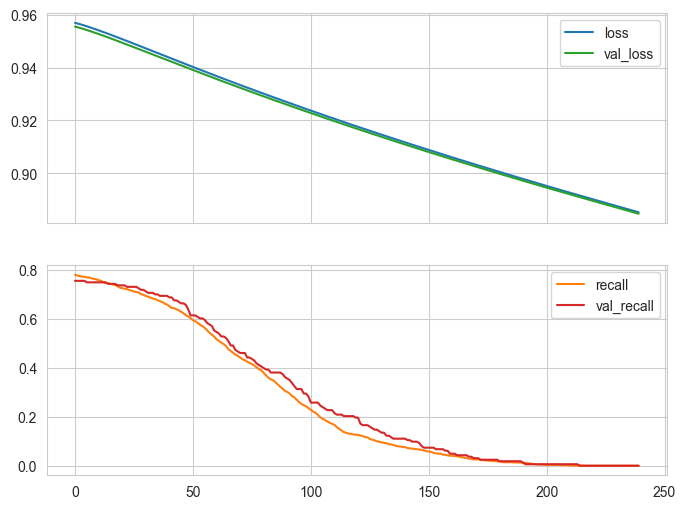

In [177]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(8,6))
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [178]:
y_pred = (model6.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1584    9]
 [ 407    0]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



63/63 [==============================] - 0s 2ms/step


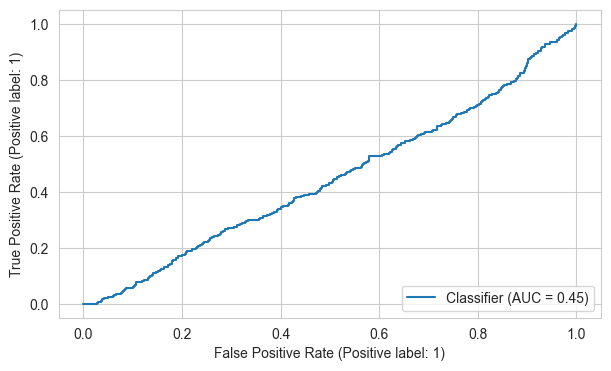

In [179]:
y_pred_proba = model6.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [180]:
loss, recall = model6.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.8929963707923889
recall:  0.0


In [181]:
roc_auc_score(y_test, y_pred_proba)

0.44677651457312473

# Final Model and Model Deployment

In [182]:
import pickle

pickle.dump(scaler, open("ann_churn", 'wb'))

In [183]:
y_pred = model1.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1222  371]
 [ 100  307]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1593
           1       0.45      0.75      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



In [184]:
model1.save('churn_pred.h5')

In [185]:
from tensorflow.keras.models import load_model

In [186]:
model_churn = load_model('churn_pred.h5')

## Prediction

In [187]:
scaler_churn = pickle.load(open("ann_churn", "rb"))

In [188]:
churn = df.drop('exited', axis = 1).iloc[0:1, :]
churn

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geo_France,geo_Germany,geo_Spain
0,619,0,42,2,0.000,1,1,1,101348.880,1,0,0


In [189]:
churn = scaler_churn.transform(churn)
churn

array([[0.538     , 0.        , 0.32432432, 0.2       , 0.        ,
        0.        , 1.        , 1.        , 0.50673489, 1.        ,
        0.        , 0.        ]])

In [190]:
(model_churn.predict(churn) > 0.5).astype("int32")

1/1 [==============================] - 0s 113ms/step


array([[1]])

In [191]:
df["exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___